## Gather

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
patients = pd.read_csv('patients.csv')
treatments = pd.read_csv('treatments.csv')
adverse_reactions = pd.read_csv('adverse_reactions.csv')

## Assess

In [3]:
patients.head(1)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6


In [4]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [5]:
treatments.head(1)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.2,NaN


In [6]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    280 non-null    object 
 1   surname       280 non-null    object 
 2   auralin       280 non-null    object 
 3   novodra       280 non-null    object 
 4   hba1c_start   280 non-null    float64
 5   hba1c_end     280 non-null    float64
 6   hba1c_change  171 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [7]:
adverse_reactions.head(1)

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort


In [8]:
adverse_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   given_name        34 non-null     object
 1   surname           34 non-null     object
 2   adverse_reaction  34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


In [9]:
all_columns = pd.Series(list(patients) + list(treatments) + list(adverse_reactions))
all_columns[all_columns.duplicated()]

14    given_name
15       surname
21    given_name
22       surname
dtype: object

In [10]:
patients.surname.value_counts()

Doe            6
Jakobsen       3
Taylor         3
Lâm            2
Bùi            2
              ..
Šlezinger      1
Mobourne       1
Frederiksen    1
Fujiwara       1
Ibeamaka       1
Name: surname, Length: 466, dtype: int64

In [11]:
patients.address.value_counts()

123 Main Street              6
2778 North Avenue            2
2476 Fulton Street           2
648 Old Dear Lane            2
192 Patton Lane              1
                            ..
475 Preston Street           1
4894 Chandler Hollow Road    1
1373 Wilmar Farm Road        1
1717 Vineyard Drive          1
989 Wayback Lane             1
Name: address, Length: 483, dtype: int64

In [12]:
patients[patients['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [13]:
patients[patients.address.duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [14]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [15]:
patients.weight.sort_values()

210     48.8
459    102.1
335    102.7
74     103.2
317    106.0
       ...  
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 503, dtype: float64

In [16]:
patients.query('weight == 48.8')

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691.0,United States,330-202-2145CamillaZaitseva@superrito.com,11/26/1938,48.8,63,19.1


In [17]:
weight_lbs = patients[patients.surname == 'Zaitseva'].weight * 2.20462
height_in = patients[patients.surname == 'Zaitseva'].height
bmi_check = 703 * weight_lbs / (height_in * height_in)
bmi_check

210    19.055827
dtype: float64

In [18]:
sum(treatments.auralin.isnull())

0

In [19]:
sum(treatments.novodra.isnull())

0

### Quality issuues
#### patients table
- zip code is a float. not a string
- zip code has four digit sometimes
- Tim Neudorf height is 27 in instead 72 in
- fill state names sometimes, abbreviations other time
- the given name for the patient_id 9 is David, not Dsvid
- missing info(address - contact) columns
- Erroneous datatype (assigned sex, state, zip_code, birthdate)
- multiple phone number formats
- there are 6 Dohn Doe data
- multiple records for Jacobson , Gersten , Taylor
- kg instead lbs for Zaitseva

#### treatments table
- missing HbA1c changes
- 'u' next to start dose and end dose in the auralin and novodra columns
- missing records: 280 records instead of 350
- patient names are all lowercases
- Erroneous datatype (auralin and novodra)
- HbA1c calculations are wrong
- Nulls represented as dashed in auralin and novadra

#### adverse reactions table
-  Lowercase names

### Tidiness
- contact column (email and phone number) in `patients` table should be separated
- variables in `treatment` table (treatment, start&end dose) needs to be fixed
- adverse reaction table should be part of `treatments` table
- given name and surname in `patient` table are duplicated in `treatments` and `adverse_reactions` tables

## Clean

In [20]:
patients_clean = patients.copy()
treatments_clean = treatments.copy()
adverse_reactions_clean = adverse_reactions.copy()

### Miising data

#### `Treatments`: Missing records (280 instead of 350)

#### Define

import the cut treatments into the dataframe and concatnate the original `treatments` dataframe.

#### Code

In [21]:
treatments_cut = pd.read_csv('treatments_cut.csv')
treatments_clean = pd.concat([treatments_clean , treatments_cut] ,
                            ignore_index = True)

#### Test

In [22]:
treatments_clean.tail(1)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
349,armina,sauvé,36u - 46u,-,7.86,7.4,NaN


`treatments`**: missing hbA1c changes and inaccurate HbA1c changes**

#### Define

Recalcurate the `hba1c_change` column: `hba1c_start` minus `hba1c_end`

#### Code

In [23]:
treatments_clean.hba1c_change = (treatments_clean.hba1c_start - 
                                treatments_clean.hba1c_end)

#### Test

In [24]:
treatments_clean.head(1)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.2,0.43


### Tidiness

**Contact column in `patients` table two variables: phone number and email**

#### Define

Extract the phone number and email variables from the contact column using regular expression and panda's `str.extract` method. Drop the contact column when done,

#### Code

In [25]:
patients_clean['phone_number'] = patients_clean.contact.str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})', expand=True)

# [a-zA-Z] to signify emails in this dataset all start and end with letters
patients_clean['email'] = patients_clean.contact.str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z])', expand=True)


patients_clean = patients_clean.drop('contact', axis=1)

#### Test

In [26]:
list(patients_clean)

['patient_id',
 'assigned_sex',
 'given_name',
 'surname',
 'address',
 'city',
 'state',
 'zip_code',
 'country',
 'birthdate',
 'weight',
 'height',
 'bmi',
 'phone_number',
 'email']

In [27]:
patients_clean.phone_number.sample(5)

389         918-459-9811
343         203-251-3573
243         715-817-0134
64     +1 (315) 362-5858
275    +1 (224) 305-6805
Name: phone_number, dtype: object

In [28]:
# Confirm that no emails start with an integer (regex didn't match for this)
patients_clean.email.sort_values().head()

404               AaliyahRice@dayrep.com
11          Abdul-NurMummarIsa@rhyta.com
332                AbelEfrem@fleckens.hu
258              AbelYonatan@teleworm.us
305    AddolorataLombardi@jourrapide.com
Name: email, dtype: object

**Three variables in two columns in `treatments` table (treatment, start dose and end dose)**

#### Define

Melt eh auralin and novodra columns to a treatment and a dose column (dose will still contain both start anf end dose at this point) 
Then split the dose column on ' - ' to obtain start_dose and end_dose columns.
Drop the dose columns

#### Code

In [29]:
treatments_clean = pd.melt(treatments_clean ,id_vars= ['given_name' , 'surname' , 'hba1c_start' , 'hba1c_end' , 'hba1c_change'],
                           var_name='treatment', value_name='dose')

In [30]:
treatments_clean = treatments_clean[treatments_clean.dose != "-"]
treatments_clean['dose_start'] , treatments_clean['dose_end'] = treatments_clean['dose'].str.split(' - ' , 1).str
treatments_clean = treatments_clean.drop('dose' , axis = 1)

C:\Users\bebop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


#### Test

In [31]:
treatments_clean.head(1)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end
0,veronika,jindrová,7.63,7.2,0.43,auralin,41u,48u


**Adverse reaction should be `treatments` table**

#### Define

Merge the adverse_reaction columns to the `treatments` table, joining on given name and
surname

#### Code

In [32]:
treatments_clean = pd.merge(treatments_clean , adverse_reactions_clean,
                           on = ['given_name' , 'surname'] , how = 'left')

#### Test

In [33]:
treatments_clean.head(1)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
0,veronika,jindrová,7.63,7.2,0.43,auralin,41u,48u,NaN


**Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reaction` table and Lowercase given names and surnames**

#### Define

Adverse reaction table is no longer needed so ignore that part, Isolate the patient ID and names in the `patience` table, then convert these names to lower case to join with `treatments`, Then drop the given name and surname columns in the treatment table(so these being lowercase isn't an issue anymore).

#### Code

In [34]:
id_names = patients_clean[['patient_id' , 'given_name' , 'surname']]
id_names.given_name = id_names.given_name.str.lower()
id_names.surname = id_names.surname.str.lower()
treatments_clean = pd.merge(treatments_clean , id_names, on = ['given_name' , 'surname'])
treatments_clean = treatments_clean.drop(['given_name' , 'surname'] , axis = 1)

C:\Users\bebop\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Test

In [35]:
treatments_clean.head(1)

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.2,0.43,auralin,41u,48u,NaN,225


In [36]:
# Patient ID should be the only duplicate column
all_columns = pd.Series(list(patients_clean) + list(treatments_clean))
all_columns[all_columns.duplicated()]

22    patient_id
dtype: object

### Quality

**Zip code is a float not a string and Zip code has four digits someimes**

**Define**

Convert the zip code column's data type from a float to a string using `astyype` , remove the '.0' using string slicing. and pad four digit zip codes with a leading 0.

#### Code

In [37]:
patients_clean.zip_code = patients_clean.zip_code.astype(str).str[:-2].str.pad(5 , fillchar = "0")
patients_clean.zip_code = patients_clean.zip_code.replace('0000n' , np.nan)

In [38]:
pd.set_option('display.max_rows', None)
patients_clean.zip_code

0      92390
1      61812
2      68467
3      07095
4      36303
5      32114
6      84728
7      95037
8      64105
9      10011
10     49780
11     37027
12     24504
13     35203
14     74105
15     37660
16     93706
17     30082
18     59324
19     95966
20     02382
21     10523
22     10570
23     33830
24     12771
25     87109
26     61602
27     70091
28     19034
29     12771
30     80112
31     37618
32     90815
33     60115
34     04474
35     10004
36     54701
37     57350
38     01581
39     02081
40     30303
41     56230
42     33409
43     82939
44     04901
45     38310
46     15201
47     30337
48     60148
49     43537
50     18701
51     52801
52     50322
53     02038
54     01803
55     89119
56     31024
57     91941
58     15205
59     27893
60     92101
61     93301
62     02178
63     92103
64     13221
65     46065
66     92103
67     01752
68     53204
69     60148
70     45701
71     06103
72     70001
73     02035
74     74106
75     94538
76     55410

**Tim Neudorf height is 27 in instead of 72 in**

#### Define

Replace height for rows in the `patients` table that hav a height of 27 in with 72 in.

#### Code

In [39]:
patients_clean.height = patients_clean.height.replace(27 , 72)

In [40]:
patients_clean.query('surname == "Neudorf"')

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,2/18/1928,192.3,72,26.1,334-515-7487,TimNeudorf@cuvox.de


**Full state names sometimes, abbreviations other times**

#### Define

Apply a function that converts full state name to state abbreviation for California, New York, Illinois, Florida, and Nebraska.

#### Code

In [41]:
state_abbrev = {'California' : 'CA' ,
               'New York' : 'NY' ,
               'Illinois' : 'IL' ,
               'Florida' : 'FL' ,
               'Nebraska' : 'NE'}

In [42]:
def abbreviate_state(patient):
    if patient['state'] in state_abbrev.keys():
        abbrev = state_abbrev[patient['state']]
        return abbrev
    else:
        return patient['state']

In [43]:
patients_clean['state'] = patients_clean.apply(abbreviate_state , axis = 1)

#### Test

In [44]:
patients_clean.state.value_counts()

CA    60
NY    47
TX    32
IL    24
FL    22
MA    22
PA    18
GA    15
OH    14
OK    13
LA    13
MI    13
NJ    12
VA    11
MS    10
WI    10
MN     9
AL     9
TN     9
IN     9
WA     8
NC     8
KY     8
MO     7
NV     6
NE     6
KS     6
ID     6
CT     5
IA     5
SC     5
RI     4
ME     4
AZ     4
AR     4
CO     4
ND     4
WV     3
OR     3
DE     3
MD     3
SD     3
MT     2
DC     2
VT     2
WY     1
AK     1
NH     1
NM     1
Name: state, dtype: int64

#### Dsvid Gustafson

#### Define

Replace given name for rows in the `patients` table that have a given name of 'Dsvid' with 'David'

#### Code

In [45]:
patients_clean.given_name = patients_clean.given_name.replace('Dsvid' , 'David')

#### Test

In [46]:
patients_clean.query('surname == "Gustafsson"')

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
8,9,male,David,Gustafsson,1790 Nutter Street,Kansas City,MO,64105,United States,3/6/1937,163.9,66,26.5,816-265-9578,DavidGustafsson@armyspy.com


**Erroneous datatypes (asskgned sex, state, zip_code, and birthdate colomns) and Erroneous datatypes (aoralin and novodra columns) and The letter 'u' in starting and ending dose for Auralin and Novodra**

#### Define

Convert assigned sex and state to categorical data types. Zip code data type was already addressed avobe. Convert birthdate to determine data type. Strip the letter 'u' in start dose and convert those columns to data type integer.

#### Code

In [47]:
#To category
patients_clean.assigned_sex = patients_clean.assigned_sex.astype('category')
patients_clean.state = patients_clean.state.astype('category')

# To determine
patients_clean.birthdate = pd.to_datetime(patients_clean.birthdate)

# Strip u and to integer
treatments_clean.dose_start = treatments_clean.dose_start.str.strip('u').astype(int)
treatments_clean.dose_end = treatments_clean.dose_end.str.strip('u').astype(int)

#### Test

In [49]:
patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   patient_id    503 non-null    int64         
 1   assigned_sex  503 non-null    category      
 2   given_name    503 non-null    object        
 3   surname       503 non-null    object        
 4   address       491 non-null    object        
 5   city          491 non-null    object        
 6   state         491 non-null    category      
 7   zip_code      491 non-null    object        
 8   country       491 non-null    object        
 9   birthdate     503 non-null    datetime64[ns]
 10  weight        503 non-null    float64       
 11  height        503 non-null    int64         
 12  bmi           503 non-null    float64       
 13  phone_number  491 non-null    object        
 14  email         491 non-null    object        
dtypes: category(2), datetime64[ns](1), float

In [175]:
treatments_clean.head(1)

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.2,0.43,auralin,41,48,NaN,225


#### Multiple phone number formats

#### Define

Strip all " ", "-", (", "), and "+" and store each number without any formatting. Pad the phone nunber with 1 if the length of the number is 10 digits (for country code).

In [53]:
patients_clean.phone_number = patients_clean.phone_number.str.replace(r'\D+' , '').str.pad(11 , fillchar = '1')

#### Test

In [54]:
patients_clean.phone_number.head()

0    19517199170
1    12175693204
2    14023636804
3    17326368246
4    13345157487
Name: phone_number, dtype: object

#### Default John Doe data

#### Define

Remove the non-recoverable John Doe records from the `patients` table.

#### Code

In [55]:
patients_clean = patients_clean[patients_clean.surname != 'Doe']

#### Test

In [56]:
patients_clean.surname.value_counts()

Jakobsen             3
Taylor               3
Liễu                 2
Lund                 2
Nilsen               2
Parker               2
Bùi                  2
Hueber               2
Collins              2
Souza                2
Schiavone            2
Dratchev             2
Lương                2
Tạ                   2
Batukayev            2
Gersten              2
Cindrić              2
Lâm                  2
Johnson              2
Grímsdóttir          2
Correia              2
Tucker               2
Kadyrov              2
Ogochukwu            2
Woźniak              2
Kowalczyk            2
Aranda               2
Silva                2
Berg                 2
Cabrera              2
Sokołowska           1
Adams                1
Ch'eng               1
Werner               1
Wilkinson            1
Mansour              1
Yudina               1
Borgen               1
Csorba               1
Uspenskaya           1
Kifle                1
Abdulov              1
Leppäluoto           1
Mensa      

#### Multiple records for Jackobsen, Gersten, Taylor

#### Define

Remove the Jake Jakobsen, Pat Gersten, and Sandy Taylor rows from the `patients` table. These are the nicknames, which happen to also not be in the `treatments` table (removing the wrong name would create a consistency issue between the `patients` and `treatments` table). These are all the second occurrence of the duplicate. These are also only occurences of non-null duplicate addresses.

#### Code

In [59]:
# tilde means not: http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing
patients_clean = patients_clean[~((patients_clean.address.duplicated())
                                  & patients_clean.address.notnull())]

#### Test

In [65]:
patients_clean[patients_clean.surname == 'Jakobsen']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
432,433,female,Karen,Jakobsen,1690 Fannie Street,Houston,TX,77020,United States,1962-11-25,185.2,67,29.0,19792030438,KarenJakobsen@jourrapide.com


In [64]:
patients_clean[patients_clean.surname == 'Gersten']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,14028484923,PatrickGersten@rhyta.com


In [66]:
patients_clean[patients_clean.surname == 'Taylor']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,13044382648,SandraCTaylor@dayrep.com
426,427,male,Rogelio,Taylor,4064 Marigold Lane,Miami,FL,33179,United States,1992-09-02,186.6,69,27.6,13054346299,RogelioJTaylor@teleworm.us


#### kgs instead of lbs for Zaitseva weight

#### Define

Use **advanced indexing** to isolate the row where the surname is Zaitseva and convert the entey in its weight field from kg to lbs.

#### Code

In [67]:
weight_kg = patients_clean.weight.min()
mask = patients_clean.surname == 'Zaitseva'
column_name = 'weight'
patients_clean.loc[mask , column_name] = weight_kg * 2.20462

#### Test

In [68]:
patients_clean.weight.sort_values()

459    102.100000
335    102.700000
74     103.200000
317    106.000000
171    106.500000
51     107.100000
210    107.585456
270    108.100000
198    108.500000
48     109.100000
478    109.600000
141    110.200000
38     111.800000
438    112.000000
14     112.000000
235    112.200000
307    112.400000
191    112.600000
408    113.100000
49     113.300000
326    114.000000
338    114.100000
253    117.000000
321    118.400000
168    118.800000
1      118.800000
350    119.000000
207    119.200000
265    120.000000
341    120.300000
208    121.200000
0      121.700000
467    122.100000
218    122.200000
225    122.300000
404    123.000000
397    123.400000
424    123.600000
483    123.900000
306    124.100000
278    124.300000
120    124.500000
363    124.700000
185    125.100000
423    125.200000
419    126.100000
494    126.300000
232    126.900000
214    126.900000
342    127.200000
280    128.500000
256    128.900000
184    128.900000
17     129.100000
422    129.400000
206    129

# Auralin vs. Novodra: Clinical Trial Key Metrics

#### Adverse Reactions

In [95]:
after_adverse_reactions = treatments_clean.groupby(['treatment' , 'adverse_reaction']).patient_id.count()

In [98]:
after_adverse_reactions

treatment  adverse_reaction         
auralin    cough                         1
           headache                      1
           hypoglycemia                 10
           nausea                        1
           throat irritation             2
novodra    cough                         1
           headache                      2
           hypoglycemia                 10
           injection site discomfort     6
           nausea                        1
Name: patient_id, dtype: int64

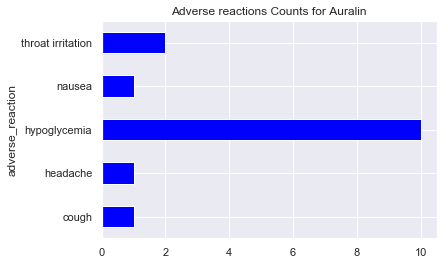

In [101]:
after_adverse_reactions.auralin.plot(kind = 'barh',
                                    title = 'Adverse reactions Counts for Auralin',
                                    color = 'blue');

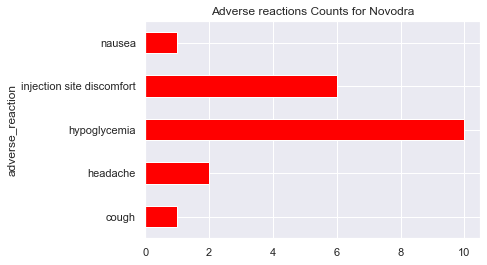

In [103]:
after_adverse_reactions.novodra.plot(kind = 'barh',
                                    title = 'Adverse reactions Counts for Novodra',
                                    color = 'red');

# Pre-trial / Post-trial Mean Insulin Dose change(IU)

Note: insulin is measured in international units of insulin (1IU or 1u)

In [132]:
after_mean_dose_change = treatments_clean.groupby('treatment').dose_start.mean() - \
treatments_clean.groupby('treatment').dose_end.mean()

In [133]:
after_mean_dose_change

treatment
auralin   -8.325714
novodra    0.385057
dtype: float64

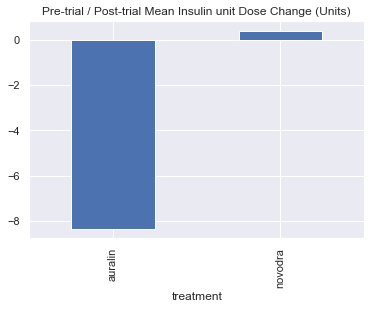

In [135]:
after_mean_dose_change.plot(kind = 'bar',
                           title = 'Pre-trial / Post-trial Mean Insulin unit Dose Change (Units)');

#### Auralin requires 8 more units 

In [138]:
treatments.head(1)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.2,NaN


In [170]:
auralin_before = treatments.query('novodra == "-"').hba1c_change.mean()
auralin_before

0.3448717948717948

In [171]:
novodra_before = treatments.query('auralin == "-"').hba1c_change.mean()
novodra_before

0.7147311827956988

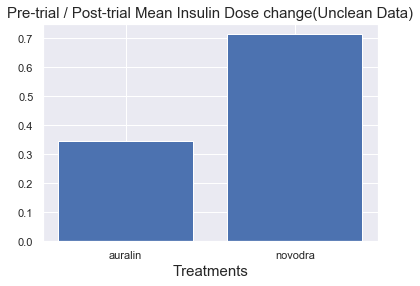

In [163]:
locations = [1 , 2]
heights = [auralin_before , novodra_before]
labels = ['auralin' , 'novodra']
plt.bar(locations , heights , tick_label = labels)
plt.title('Pre-trial / Post-trial Mean Insulin Dose change(Unclean Data)' , fontsize = 15)
plt.xlabel('Treatments' , fontsize = 15);

#### Before the cleaning, there was a big difference between auralin and novodra hba1c reduction.

In [172]:
after_describe = treatments_clean.groupby('treatment').hba1c_change.mean()
after_describe

treatment
auralin    0.387657
novodra    0.404713
Name: hba1c_change, dtype: float64

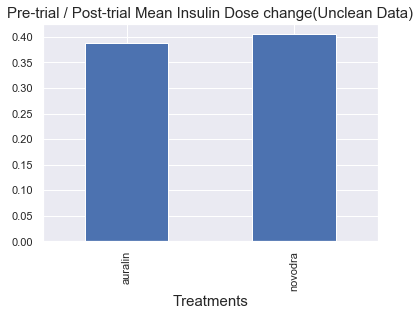

In [169]:
after_describe.plot(kind = 'bar')
plt.title('Pre-trial / Post-trial Mean Insulin Dose change(Unclean Data)' , fontsize = 15)
plt.xlabel('Treatments' , fontsize = 15);

### Confidence interval for the difference in hba1c change After cleaning

A "noninferior" difference between the two groups was predetermined as the upper limit of the confidence interval to be less than 0.4%

In [173]:
diffs = []
for _ in range(10000):
    sample = treatments_clean.sample(treatments_clean.shape[0], replace=True)
    mean_auralin = sample[sample.treatment == "auralin"].hba1c_change.mean()
    mean_novodra = sample[sample.treatment == "novodra"].hba1c_change.mean()
    mean_height_diff = mean_novodra - mean_auralin
    diffs.append(mean_height_diff)
low, high = np.percentile(diffs, 0.5), np.percentile(diffs, 99.5)
print(low, high)

0.00047170870796254557 0.033556243765119585


## Upper limit is less than 0.4%. Auralin should pass the clinical trials.